<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M4L1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Perceptron**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

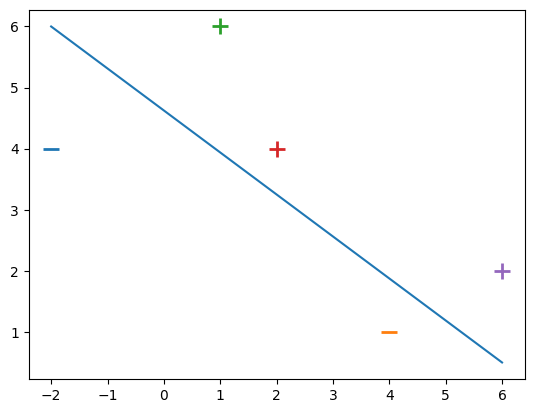

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

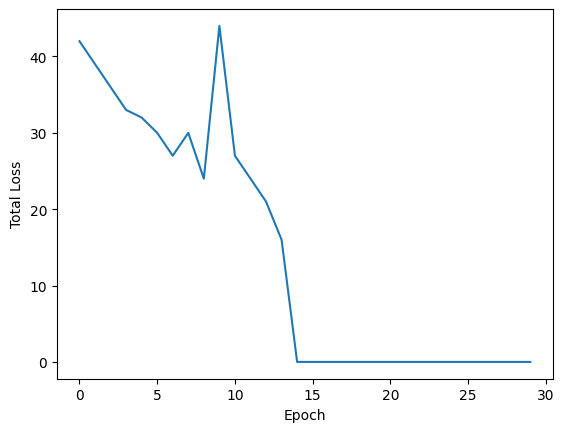

In [8]:
w = perceptron_algo_plot(X, y)

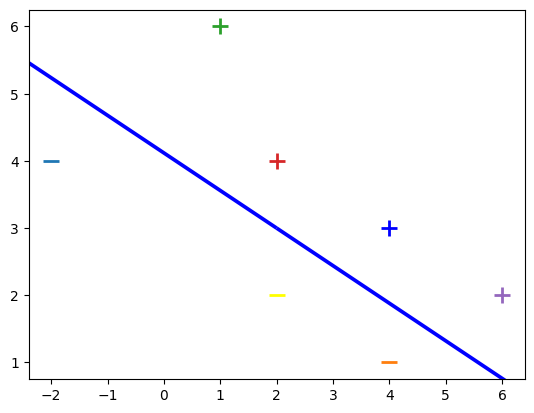

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

**Questions Set 1**

**1. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.**

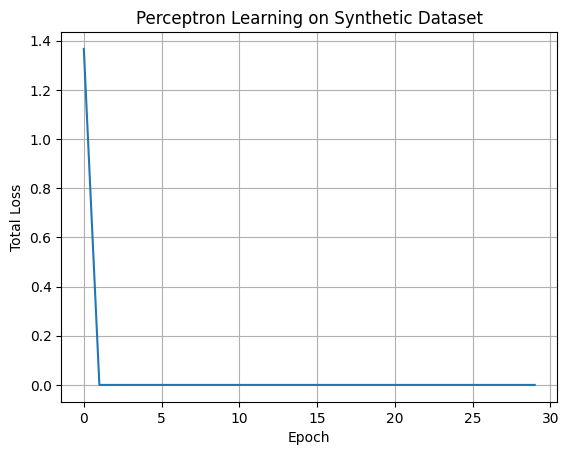

Learned weights: [-1.14353565  2.92859715  0.        ]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset with correct parameters
X, y = make_classification(
    n_samples=100,  # Number of samples
    n_features=2,   # Number of features
    n_informative=2, # All features are informative
    n_redundant=0,   # No redundant features
    n_classes=2,    # Number of classes
    n_clusters_per_class=1,
    flip_y=0,       # No noise
    class_sep=2,    # High separation between classes
    random_state=42
)

# Convert target to binary (-1, 1)
y = np.where(y == 1, 1, -1)

# Add a bias term to the features
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the perceptron algorithm with plotting
def perceptron_algo_plot(X, Y, n_epochs=30, eta=1):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(n_epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Learning on Synthetic Dataset')
    plt.grid(True)
    plt.show()

    return w

# Train the perceptron and plot the error
weights = perceptron_algo_plot(X_train, y_train, n_epochs=30, eta=1)
print("Learned weights:", weights)


**2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

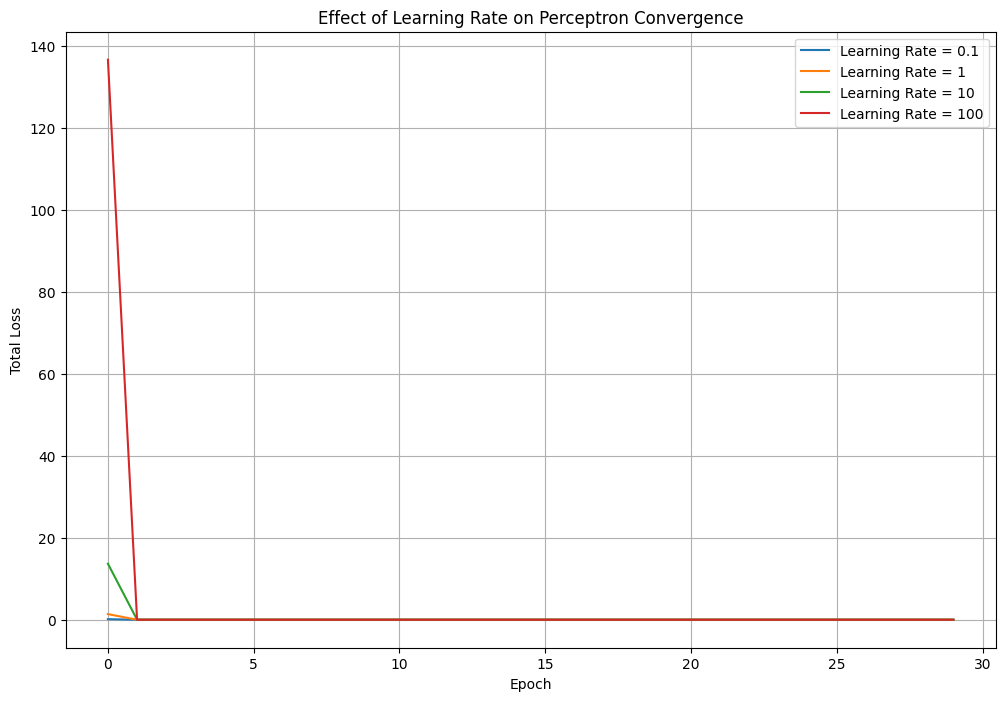

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset with correct parameters
X, y = make_classification(
    n_samples=100,  # Number of samples
    n_features=2,   # Number of features
    n_informative=2, # All features are informative
    n_redundant=0,   # No redundant features
    n_classes=2,    # Number of classes
    n_clusters_per_class=1,
    flip_y=0,       # No noise
    class_sep=2,    # High separation between classes
    random_state=42
)

# Convert target to binary (-1, 1)
y = np.where(y == 1, 1, -1)

# Add a bias term to the features
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the perceptron algorithm with errors tracking
def perceptron_algo_with_errors(X, Y, n_epochs=30, eta=1):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(n_epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
    return w, errors

# Analyze convergence for different learning rates
learning_rates = [0.1, 1, 10, 100]
results = {}

plt.figure(figsize=(12, 8))
for eta in learning_rates:
    weights, errors = perceptron_algo_with_errors(X_train, y_train, n_epochs=30, eta=eta)
    results[eta] = errors
    plt.plot(errors, label=f'Learning Rate = {eta}')

# Plot the results
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Effect of Learning Rate on Perceptron Convergence')
plt.legend()
plt.grid(True)
plt.show()


**3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.**

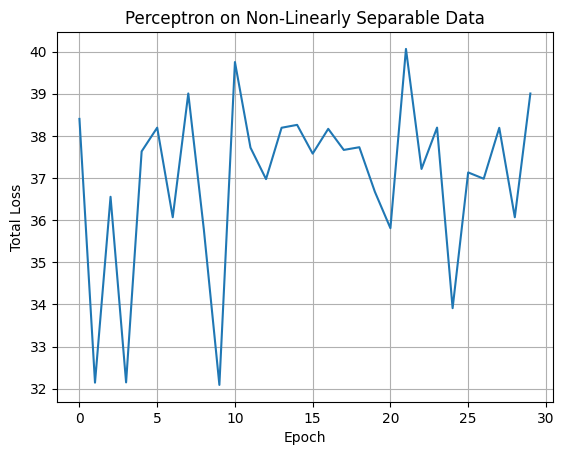

Final weights: [-1.34144818  0.72767504  0.        ]
Final error trend: [37.13222778450098, 36.98197771684941, 38.191213337519216, 36.068327839532934, 39.005146534310455]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Convert target to binary (-1, 1)
y = np.where(y == 1, 1, -1)

# Add a bias term to the features
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the perceptron algorithm with error tracking
def perceptron_algo_with_errors(X, Y, n_epochs=30, eta=1):
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(n_epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
    return w, errors

# Train the perceptron and track errors
weights, errors = perceptron_algo_with_errors(X_train, y_train, n_epochs=30, eta=1)

# Plot the errors
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron on Non-Linearly Separable Data')
plt.grid(True)
plt.show()

# Observations
print("Final weights:", weights)
print("Final error trend:", errors[-5:])  # Display last few errors to observe convergence behavior


**Questions Set 2**

**1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.**

**Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.**

**Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.**

(i)
Yes, this dataset is learnable by a Perceptron because:

The data is linearly separable:

A linear decision boundary can separate the outputs
𝑦
=
+
1
y=+1 and
𝑦
=
−
1
y=−1.
The points
(0,0),(0,1),(1,0) belong to the negative class, while
(1,1) belongs to the positive class.
The Perceptron algorithm works for linearly separable datasets. It will converge to a solution in a finite number of steps.

(ii)
Initialization:
Weights:
w=[0,0]
Bias:
b=0
Learning rate: Assume
η=1
Algorithm:
For each iteration, we:

Compute the output
y
^
​
 =sign(w⋅x+b).
Update weights and bias only if
𝑦
^
≠
𝑦:
w=w+η⋅y⋅x ;
b=b+η⋅y.

**2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?**

**Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.**

In [16]:
# Boolean Functions Learnability Analysis

# 1. Inputs: (x1, x2) ∈ {0, 1} × {0, 1}
# 2. Output: y ∈ {0, 1}
# We analyze the 16 possible boolean functions to determine which are learnable by a Perceptron.

# Non-learnable Boolean Functions: XOR and its variations

# 1. XOR (f_7)
# Truth table:
print("XOR Function:")
print("| x1 | x2 | y |")
print("|----|----|---|")
print("|  0 |  0 | 0 |")
print("|  0 |  1 | 1 |")
print("|  1 |  0 | 1 |")
print("|  1 |  1 | 0 |")

# 2. NOT XOR (XNOR) (f_10)
# Truth table:
print("\nXNOR Function:")
print("| x1 | x2 | y |")
print("|----|----|---|")
print("|  0 |  0 | 1 |")
print("|  0 |  1 | 0 |")
print("|  1 |  0 | 0 |")
print("|  1 |  1 | 1 |")

# 3. Another XOR variation (f_11)
# Truth table:
print("\nAnother XOR Variation:")
print("| x1 | x2 | y |")
print("|----|----|---|")
print("|  0 |  0 | 1 |")
print("|  0 |  1 | 0 |")
print("|  1 |  0 | 1 |")
print("|  1 |  1 | 0 |")

# Summary
print("\nSummary:")
print("Total Boolean Functions: 16")
print("Learnable by Perceptron: 13")
print("Not Learnable: 3 (XOR and its variations)")


XOR Function:
| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 0 |
|  0 |  1 | 1 |
|  1 |  0 | 1 |
|  1 |  1 | 0 |

XNOR Function:
| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 1 |
|  0 |  1 | 0 |
|  1 |  0 | 0 |
|  1 |  1 | 1 |

Another XOR Variation:
| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 1 |
|  0 |  1 | 0 |
|  1 |  0 | 1 |
|  1 |  1 | 0 |

Summary:
Total Boolean Functions: 16
Learnable by Perceptron: 13
Not Learnable: 3 (XOR and its variations)
